---
title: "Assignment for Week 5"
author: "Nick Climaco"
date: today
date-format: long
format:
  html:
    toc: true
    toc-depth: 3
    toc-float:
      toc-position: right
    html-math-method: katex
  pdf:
    toc: true
    documentclass: article
    fontsize: 11pt
    geometry: margin=0.75in
    highlight: tango
    keep-tex: true
    include-in-header: 
       text: |
         \usepackage{fvextra}
         \DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaklines,commandchars=\\\{\}}
         \DefineVerbatimEnvironment{OutputCode}{Verbatim}{breaklines,commandchars=\\\{\}}
         \fvset{breaksymbolleft={}, breakindent=1em}
jupyter: python3
---

The is the Electric vehicle popoulation in the state of Washington and sourced from https://catalog.data.gov/dataset/electric-vehicle-population-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
df = df[(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] ==
         'Clean Alternative Fuel Vehicle Eligible') & (df['Base MSRP'] > 0)].drop('Postal Code', axis=1)


In [3]:
df_1000 = df.iloc[:1000, :]
df_1000.shape


(1000, 16)

In [4]:
df_1000.to_csv('workset.csv', index=False)
# upload to mockaroo


In [5]:
df_1000.describe()


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,2014.27200,173.791000,59771.040000,33.420000,1.938014e+08,5.303478e+10
std,2.02042,63.306722,18632.569288,13.827103,9.023582e+07,1.231253e+07
min,2008.00000,31.000000,31950.000000,1.000000,2.014000e+05,5.300501e+10
25%,2013.00000,93.000000,38483.750000,23.000000,1.386559e+08,5.303301e+10
50%,2014.00000,208.000000,69900.000000,37.000000,1.874724e+08,5.303302e+10
75%,2016.00000,208.000000,69900.000000,45.000000,2.377686e+08,5.303303e+10
max,2019.00000,265.000000,110950.000000,49.000000,4.788591e+08,5.307700e+10


In [6]:
mock_df = pd.read_csv('MOCK_DATA.csv')
mock_df.describe()


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,2014.469000,149.921000,50401.017500,15.952000,1.598606e+08,5.304201e+10
std,1.104653,33.420304,10813.352181,8.853818,1.899350e+07,2.024245e+07
min,2013.000000,93.000000,31956.600000,1.000000,1.271747e+08,5.300802e+10
25%,2013.750000,119.300000,41136.050000,8.000000,1.437425e+08,5.302391e+10
50%,2014.000000,151.950000,50156.700000,16.000000,1.600739e+08,5.304218e+10
75%,2015.000000,178.650000,59800.625000,24.000000,1.763463e+08,5.306036e+10
max,2016.000000,208.000000,69796.900000,31.000000,1.929495e+08,5.307689e+10


In [7]:
summary_combined = pd.concat(
    [df_1000.describe(), mock_df.describe()], keys=['df_1000', 'mock_df'])


Difference between the real values and mockaroo generated data.

In [8]:
diff_summary = summary_combined.loc['df_1000'] - \
    summary_combined.loc['mock_df']


diff_summary


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
mean,-0.197000,23.870000,9370.022500,17.468000,3.394080e+07,-7.232246e+06
std,0.915767,29.886418,7819.217107,4.973286,7.124231e+07,-7.929920e+06
min,-5.000000,-62.000000,-6.600000,0.000000,-1.269733e+08,-3.006389e+06
25%,-0.750000,-26.300000,-2652.300000,15.000000,-5.086594e+06,9.100871e+06
50%,0.000000,56.050000,19743.300000,21.000000,2.739859e+07,-9.154662e+06
75%,1.000000,29.350000,10099.375000,21.000000,6.142233e+07,-2.732368e+07
max,3.000000,57.000000,41153.100000,18.000000,2.859096e+08,1.165815e+05


PLotting the numerical columns of each data set

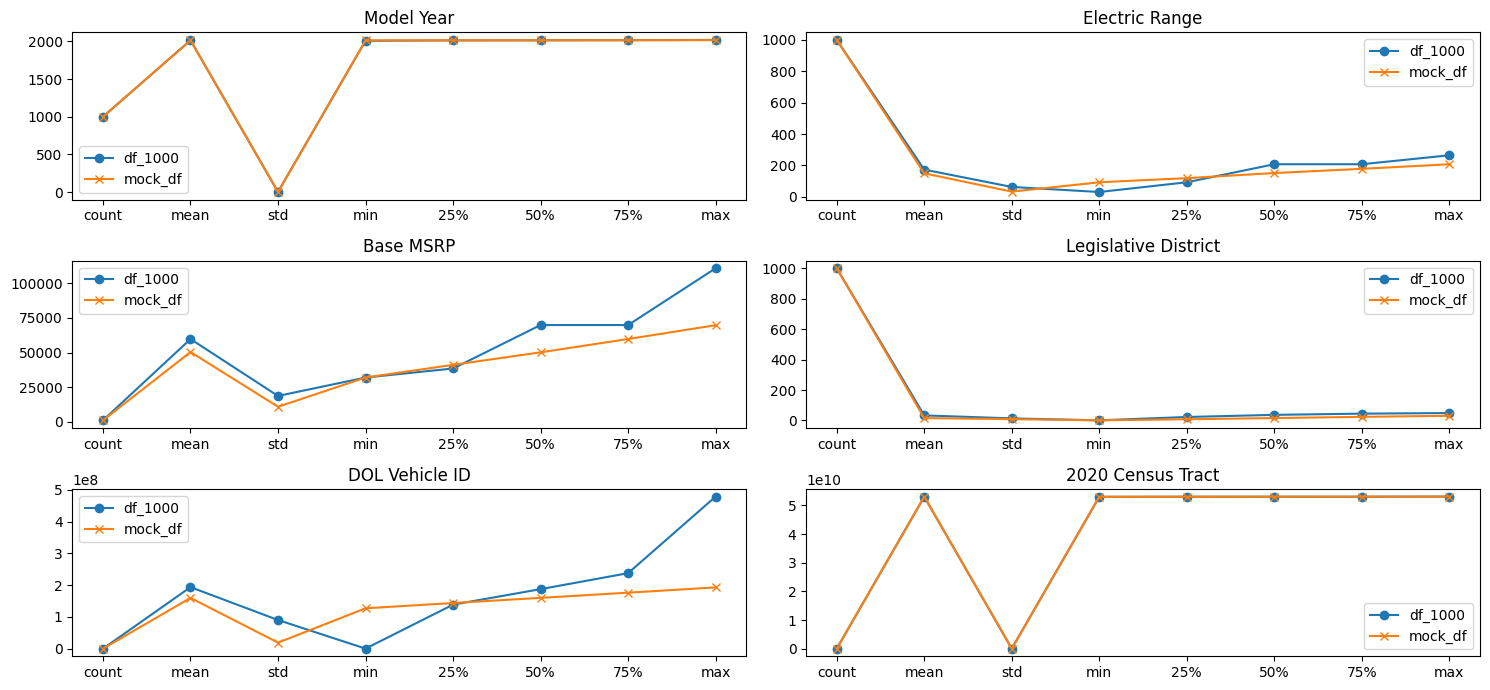

In [9]:
columns_to_plot = ['Model Year', 'Electric Range',
                   'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].plot(summary_combined.loc['df_1000', column],
                 label='df_1000', marker='o')
    axes[i].plot(summary_combined.loc['mock_df', column],
                 label='mock_df', marker='x')
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [10]:
diff_summary


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
mean,-0.197000,23.870000,9370.022500,17.468000,3.394080e+07,-7.232246e+06
std,0.915767,29.886418,7819.217107,4.973286,7.124231e+07,-7.929920e+06
min,-5.000000,-62.000000,-6.600000,0.000000,-1.269733e+08,-3.006389e+06
25%,-0.750000,-26.300000,-2652.300000,15.000000,-5.086594e+06,9.100871e+06
50%,0.000000,56.050000,19743.300000,21.000000,2.739859e+07,-9.154662e+06
75%,1.000000,29.350000,10099.375000,21.000000,6.142233e+07,-2.732368e+07
max,3.000000,57.000000,41153.100000,18.000000,2.859096e+08,1.165815e+05



### Summary

1. **Data Description**:
    - The dataset contains information about electric vehicles in Washington state, filtered to include only those eligible for Clean Alternative Fuel Vehicle (CAFV) and with a Base MSRP greater than 0.
    - The dataset was split into a subset of 1000 entries (`df_1000`) and saved for further analysis.

2. **Mock Data**:
    - A mock dataset (`mock_df`) was generated using Mockaroo to simulate similar data for comparison.

3. **Key Observations**:
    - There are noticeable differences in the mean values of Electric Range and Base MSRP between the real and mock datasets.
    - The mock data tends to have a much lower variation in some columns, as indicated by the standard deviation.
    - The mock data does not have the same max MSRP compared to the real data.
    - The plots provide a visual comparison, showing how the distributions of key numerical columns differ between the real and mock datasets.


### Improvements

To improve the accuracy of a fake dataset generated by Mockaroo, we can try using options like dynamic and weighted instead of random. The weighted option allows you to specify how frequently certain values should appear, which is useful for creating realistic distributions in categorical fields. The dynamic option, on the other hand, is effective for creating dependencies between fields. 

In [17]:
mock_df2 = pd.read_csv('dynamicMock.csv')
summary_combined2 = pd.concat(
    [df_1000.describe(), mock_df2.describe()], keys=['df_1000', 'mock_df2'])
summary_combined2


Model Year  Electric Range      Base MSRP  \
df_1000  count  1000.000000     1000.000000    1000.000000   
         mean   2014.272000      173.791000   59771.040000   
         std       2.020420       63.306722   18632.569288   
         min    2008.000000       31.000000   31950.000000   
         25%    2013.000000       93.000000   38483.750000   
         50%    2014.000000      208.000000   69900.000000   
         75%    2016.000000      208.000000   69900.000000   
         max    2019.000000      265.000000  110950.000000   
mock_df2 count  1000.000000     1000.000000    1000.000000   
         mean   2014.448000      175.094300   71351.739310   
         std       1.142191       48.081129   22410.239209   
         min    2013.000000       93.500000   31964.310000   
         25%    2013.000000      134.050000   51932.655000   
         50%    2014.000000      172.450000   71888.745000   
         75%    2015.250000      214.800000   90130.967500   
         max    2016.000000      264.900000  110776.840000   

                Legislative District  DOL Vehicle ID  2020 Census Tract  
df_1000  count           1000.000000    1.000000e+03       1.000000e+03  
         mean              33.420000    1.938014e+08       5.303478e+10  
         std               13.827103    9.023582e+07       1.231253e+07  
         min                1.000000    2.014000e+05       5.300501e+10  
         25%               23.000000    1.386559e+08       5.303301e+10  
         50%               37.000000    1.874724e+08       5.303302e+10  
         75%               45.000000    2.377686e+08       5.303303e+10  
         max               49.000000    4.788591e+08       5.307700e+10  
mock_df2 count           1000.000000    1.000000e+03       1.000000e+03  
         mean              25.267000    1.602906e+08       5.304138e+10  
         std               14.257875    1.948126e+07       1.973269e+07  
         min                1.000000    1.271989e+08       5.300797e+10  
         25%               13.000000    1.424390e+08       5.302366e+10  
         50%               25.000000    1.602752e+08       5.304088e+10  
         75%               38.000000    1.778751e+08       5.305723e+10  
         max               49.000000    1.928731e+08       5.307696e+10

In [12]:
diff_summary2 = summary_combined2.loc['df_1000'] - \
    summary_combined2.loc['mock_df2']


diff_summary2


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
mean,-0.197000,23.870000,9370.022500,17.468000,3.394080e+07,-7.232246e+06
std,0.915767,29.886418,7819.217107,4.973286,7.124231e+07,-7.929920e+06
min,-5.000000,-62.000000,-6.600000,0.000000,-1.269733e+08,-3.006389e+06
25%,-0.750000,-26.300000,-2652.300000,15.000000,-5.086594e+06,9.100871e+06
50%,0.000000,56.050000,19743.300000,21.000000,2.739859e+07,-9.154662e+06
75%,1.000000,29.350000,10099.375000,21.000000,6.142233e+07,-2.732368e+07
max,3.000000,57.000000,41153.100000,18.000000,2.859096e+08,1.165815e+05


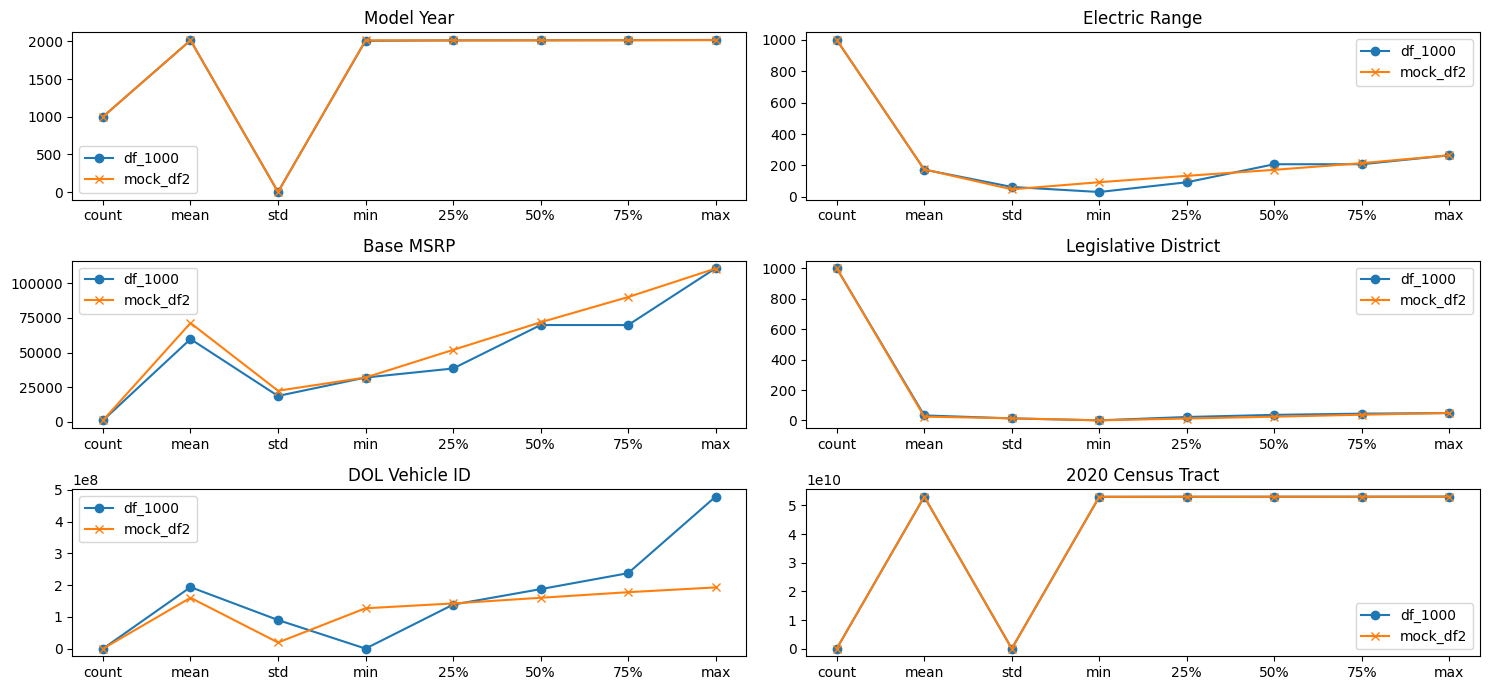

In [18]:
columns_to_plot = ['Model Year', 'Electric Range',
                   'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].plot(summary_combined2.loc['df_1000', column],
                 label='df_1000', marker='o')
    axes[i].plot(summary_combined2.loc['mock_df2', column],
                 label='mock_df2', marker='x')
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()


Using dynamic and weighted options in mockaroo does not seem to greatly improve the accuracy of the mock data albeit the Base MSRP was able to have a closer max value with the real data.


Outside of mockaroo, in order to create a more accurate fake data, we would first capture the distribution of each columns and then using these distribution to generate new points. By matching the distribtion of this fake or synthetic data to the real data, we ensure that the synthetic data retains the information and correlations of the real data. 